In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
## read the image stack
img = io.imread('/Volumes/onishlab_shared/PROJECTS/26_Jessica/WORMWHOLE/AM_Live_Bacterial_Imaging/221115/Jub66_RFP_IN_Cembio/image1_FLO.tif')

In [3]:
## our images are 4 dimensional (z, c, x, y)
img.shape

(152, 2, 5223, 6226)

In [4]:
## convert image to a numpy array 
imgarray = np.array(img)

In [5]:
imgarray

array([[[[  0,   0,   0, ..., 102, 100,  97],
         [  0,   0,   0, ...,  98,  99,  96],
         [  0,   0,   0, ...,  99,  99,  98],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],

        [[  0,   0,   0, ..., 103,  99, 107],
         [  0,   0,   0, ...,  99, 104,  98],
         [  0,   0,   0, ..., 105, 102,  98],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]]],


       [[[  0,   0,   0, ...,  96,  97, 100],
         [  0,   0,   0, ...,  99,  99,  94],
         [  0,   0,   0, ..., 102, 102, 100],
         ...,
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0]],

        [[  0,   0,   0, ..., 100, 100,  99],
         [  0,   0,   0, ..., 101, 105,  99],
         [  0,   0,   0, ..., 

In [6]:
## isolate each image channel 
img_0channel=img[:,0,:,:]
img_1channel=img[:,1,:,:]

## check 
img_0channel.shape
img_1channel.shape

(152, 5223, 6226)

In [9]:
## what are the min and max pixel values? 
## for a 16 bit image we have the potential range of 0 - 65536, check by 2**16


#np.min(img_0channel) # our minimum pixel value is 0
#np.max(img_0channel) # our maximum pixel value is 732

#np.min(img_1channel) # our minimum pixel value is 0
#np.max(img_1channel) # our maximum pixel value is 2147

## lets plot a histogram <-- need to get working 
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
 
axs.hist(x, bins = n_bins)
 
# Show plot
plt.show()

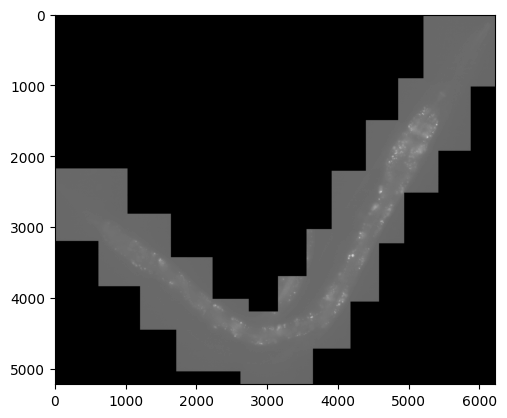

In [10]:
## lets check a slice of our images 

## we will start with the first channel
img_0channel_slice=img[76,0,:,:]
plt.imshow(img_0channel_slice,cmap='gray')
#plt.axis('off')

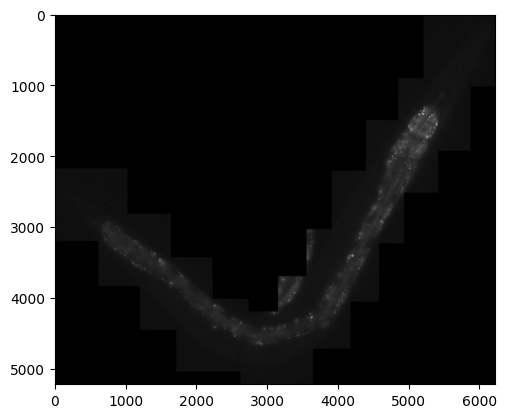

In [11]:
## now lets view the second channel
img_1channel_slice=img[76,1,:,:]
plt.imshow(img_1channel_slice,cmap='gray')
#plt.axis('off')

# Method number 1 - direct conversion

## Using 'cv2' function convertScaleAbs

what does it do? 

it rescales your array values <-- need a better understanding of this function

not recommended because it leads to saturation of some pixels

In [12]:
import cv2

img_0channel_8bit_a=cv2.convertScaleAbs(img_0channel)
img_1channel_8bit_a=cv2.convertScaleAbs(img_1channel)

In [13]:
## lets check that is now 8 bit

#img_0channel_8bit_a
img_1channel_8bit_a

array([[[  0,   0,   0, ..., 103,  99, 107],
        [  0,   0,   0, ...,  99, 104,  98],
        [  0,   0,   0, ..., 105, 102,  98],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 100, 100,  99],
        [  0,   0,   0, ..., 101, 105,  99],
        [  0,   0,   0, ..., 100, 103,  95],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ..., 106, 100,  99],
        [  0,   0,   0, ..., 103, 101, 104],
        [  0,   0,   0, ..., 102,  97, 104],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ..., 102, 100,  98],
        [  0,   0,   0, ...,  98, 100,  99],
        [  0,   0,   0, ..., 102,  94,  97

In [14]:
## what are the min and max pixel values now?

#np.min(img_0channel_8bit_a) # our new minimum pixel value is now 0
#np.max(img_0channel_8bit_a) # our new maximum pixel value is now 255

#np.min(img_1channel_8bit_a) # our new minimum pixel value is now 0
np.max(img_1channel_8bit_a) # our new maximum pixel value is now 255

255

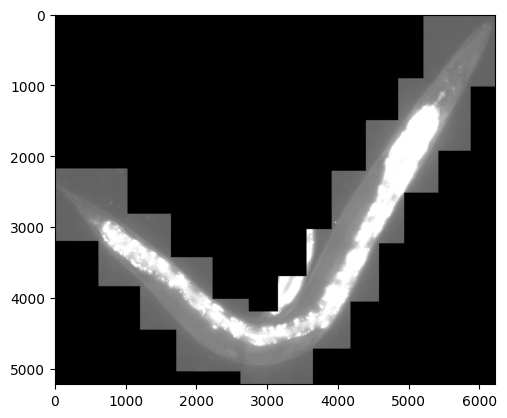

In [15]:
## lets check out a slice of this new unit8 image 

#img_0channel_8bit_a.shape # how many slices did we have again? 152
#imgSlice=img_0channel_8bit_a[72,:,:]
#plt.imshow(imgSlice, cmap='gray')

imgSlice=img_1channel_8bit_a[72,:,:]
plt.imshow(imgSlice, cmap='gray') #oh no our pixels are saturated! Not good

# Method number 1 - direct conversion

## Using 'skimage' function img_as_ubyte

what does it do? 

it converts any value (i.e., float) to unsigned integer 8 (8 bit) <-- need a better understanding of this function

not recommended becasue the pixel values are converted to a smaller range of values (i.e., 8). We are not using the full range of 8 bit which is 0 - 255

In [16]:
from skimage import img_as_ubyte

img_0channel_8bit_b=img_as_ubyte(img_0channel)
img_1channel_8bit_b=img_as_ubyte(img_1channel)

In [17]:
## what are our new min and max pixel values? 

#img_0channel_8bit_b # strange, looks like everything got converted to 0 values
#img_1channel_8bit_b 

#np.min(img_0channel_8bit_b) 
#np.max(img_0channel_8bit_b) # our new maximum pixel value is now 2

#np.min(img_1channel_8bit_b) 
#np.max(img_1channel_8bit_b) # our new maximum pixel value is now 8

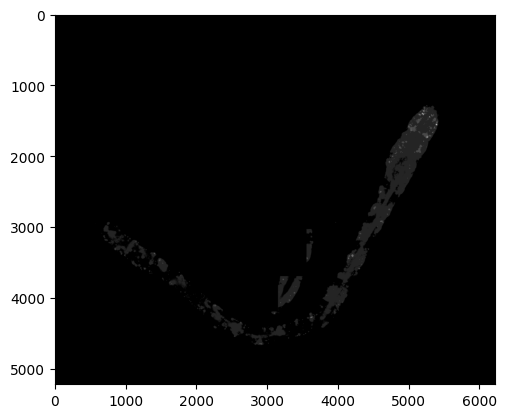

In [18]:
## lets check out a slice of our new 8bit images

#imgSlice=img_0channel_8bit_b[72,:,:]
#plt.imshow(imgSlice, cmap='gray')

imgSlice=img_1channel_8bit_b[72,:,:]
plt.imshow(imgSlice, cmap='gray')

# Method number 2 - normalize then scale data to 255 and convert to unit8

proper way to convert a unit16 image to a unit8 image

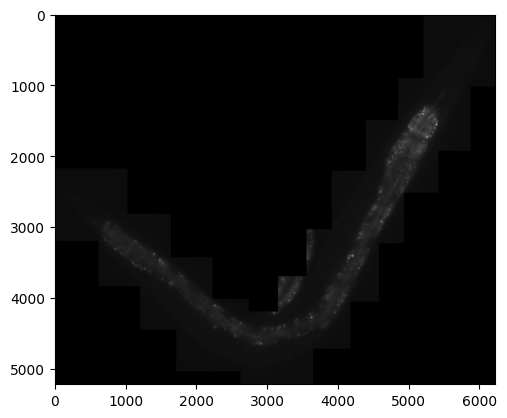

In [11]:
## manually perform

#img_0channel_8bit_c=(img_0channel / img_0channel.max()) * 255 
#img_0channel_8bit_c=np.uint8(img_0channel_8bit_c)

#img_1channel_8bit_c=(img_1channel / img_1channel.max()) * 255 
#img_1channel_8bit_c=np.uint8(img_1channel_8bit_c)


## now lets check out a slice of our new 8bit image 

#plt.imshow(img_0channel_8bit_c[72, :, :], cmap='gray')
#plt.imshow(img_1channel_8bit_c[72, :, :], cmap='gray')

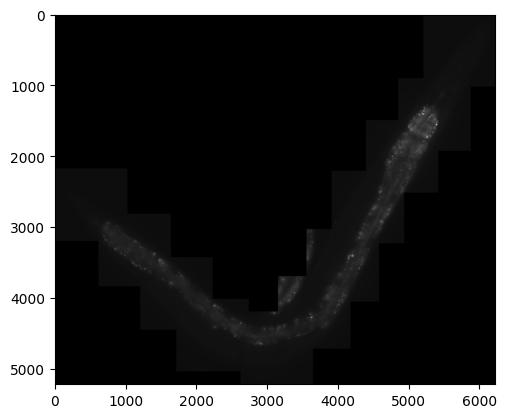

In [7]:
## using opencv
import cv2

#img_0channel_8bit_d=cv2.normalize(img_0channel, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
img_1channel_8bit_d=cv2.normalize(img_1channel, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

#plt.imshow(img_0channel_8bit_d[72, :, :], cmap='gray')
plt.imshow(img_1channel_8bit_d[72, :, :], cmap='gray')

In [ ]:
## using skimage

from skimage import exposure, img_as_ubyte

#img_0channel_8bit_e=img_as_ubyte(exposure.rescale_intensity(img_0channel))
#img_1channel_8bit_e=img_as_ubyte(exposure.rescale_intensity(img_1channel))

#plt.imshow(img_0channel_8bit_e[72, :, :], cmap='gray')
#plt.imshow(img_1channel_8bit_e[72, :, :], cmap='gray')

In [8]:
import napari

viewer = napari.view_image(img_1channel_8bit_d)
#viewer = napari.view_image(img_0channel_8bit_e)
napari.run()  # start the event loop and show viewer


In [ ]:
## webpage - https://pyimagej.readthedocs.io/en/latest/Install.html 

import sys, os
!mamba install --yes --prefix {sys.prefix} pyimagej openjdk=8
os.environ['JAVA_HOME'] = os.sep.join(sys.executable.split(os.sep)[:-2] + ['jre'])

In [51]:
## code just for saving an image slice if needed

from PIL import Image

array1 = np.reshape(img_1channel_8bit_e[72,:,:], (5223, 6226))
img1=Image.fromarray(array1)
img1.save("/Users/jessicahill/Downloads/img_1channel_8bit_e.jpg", dpi=(600,600))

In [9]:
import cProfile
